In [1]:
import glob
import pandas as pd
DIR1 = "otter"
DIR2 = "seal"
fs1 = glob.glob("{}/*".format(DIR1))
t1 = [0] * len(fs1)
fs2 = glob.glob("{}/*".format(DIR2))
t2 = [1] * len(fs2)
df = pd.DataFrame({
    "path":fs1 + fs2,
    "ans":t1 + t2
})
df

,path,ans
0,otter\0.jpg,0
1,otter\1.jpg,0
2,otter\10.jpg,0
3,otter\101.jpg,0
4,otter\102.png,0
...,...,...
1053,seal\95.jpg,1
1054,seal\96.jpg,1
1055,seal\97.png,1
1056,seal\98.jpg,1


In [2]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

Using TensorFlow backend.
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0    

In [3]:
vgg.layers

In [4]:
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
# trainable一定要在compile前
for l in vgg.layers:
    l.trainable = False
x = BatchNormalization()(vgg.output)
# MLP
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
out = Dense(2, activation="softmax")(x)
model = Model(inputs=vgg.input, outputs=out)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [6]:
# https://github.com/keras-team/keras-applications/blob/master/keras_applications/imagenet_utils.py
import numpy as np
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input
p = df.iloc[0]["path"]
img = load_img(p, target_size=(224, 224)).convert("RGB")
img_np = np.array(img)
img_pre = preprocess_input(img_np)
img_pre

array([[[ -85.939   ,  -92.779   , -100.68    ],
        [ -87.939   ,  -94.779   ,  -94.68    ],
        [ -72.939   ,  -76.779   ,  -79.68    ],
        ...,
        [ -50.939003,  -67.779   ,  -69.68    ],
        [ -54.939003,  -70.779   ,  -75.68    ],
        [ -62.939003,  -78.779   ,  -83.68    ]],

       [[ -79.939   ,  -75.779   ,  -91.68    ],
        [ -52.939003,  -49.779   ,  -63.68    ],
        [ -53.939003,  -46.779   ,  -65.68    ],
        ...,
        [ -49.939003,  -66.779   ,  -68.68    ],
        [ -53.939003,  -69.779   ,  -74.68    ],
        [ -61.939003,  -77.779   ,  -82.68    ]],

       [[ -39.939003,  -29.779   ,  -44.68    ],
        [ -39.939003,  -30.779   ,  -49.68    ],
        [ -31.939003,  -20.779   ,  -45.68    ],
        ...,
        [ -55.939003,  -69.779   ,  -72.68    ],
        [ -52.939003,  -66.779   ,  -71.68    ],
        [ -60.939003,  -74.779   ,  -79.68    ]],

       ...,

       [[ -54.939003,  -56.779   ,  -73.68    ],
        [ -

In [7]:
# 試試看numpy的randint
ori = np.random.randint(0, 10, 5)
new = list(map(lambda x:x**2, ori))
print(ori)
print(new)

[9 5 5 1 0]
[81, 25, 25, 1, 0]


In [8]:
def preprocess(path):
    img = load_img(path, target_size=(224, 224)).convert("RGB")
    img_np = np.array(img)
    img_pre = preprocess_input(img_np)
    return img_pre

def get_images(paths, targets, batch=20):
    idx = np.random.randint(0, len(paths), batch)
    ps = paths[idx]
    xs = np.array(list(map(preprocess, ps)))
    ys = targets[idx]
    return (ps, xs, ys)

In [9]:
from sklearn.model_selection import train_test_split
x = np.array(df["path"])
y = np.array(df["ans"])
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.1)
ps, xs, ys = get_images(x_train, y_train)
print(ys)

[0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0]


In [16]:
for i in range(10):
    print("-" * 15, "Times:" , i, "-" * 15)
    _, xs, ys = get_images(x_train, y_train)
    train_loss = model.train_on_batch(xs, ys)
    print("[Train]:", train_loss)
    _, xs, ys = get_images(x_test, y_test)
    val_loss = model.test_on_batch(xs, ys)
    print("[Validate]:", val_loss)

--------------- Times: 0 ---------------
[Train]: [1.2443107, 0.8666667]
[Validate]: [4.2239156, 0.9]
--------------- Times: 1 ---------------
[Train]: [0.392914, 0.95]
[Validate]: [2.500846, 0.95]
--------------- Times: 2 ---------------
[Train]: [1.178179, 0.8]
[Validate]: [2.967877, 0.95]
--------------- Times: 3 ---------------
[Train]: [0.8347114, 0.9]
[Validate]: [1.57501, 0.9]
--------------- Times: 4 ---------------
[Train]: [2.3731706, 0.8]
[Validate]: [0.9082445, 0.95]
--------------- Times: 5 ---------------
[Train]: [0.002342371, 1.0]
[Validate]: [0.0115155615, 1.0]
--------------- Times: 6 ---------------
[Train]: [1.0057646, 0.9]
[Validate]: [1.565014, 0.9]
--------------- Times: 7 ---------------
[Train]: [0.5575205, 0.95]
[Validate]: [0.3832127, 0.95]
--------------- Times: 8 ---------------
[Train]: [0.105720654, 0.95]
[Validate]: [0.75797933, 0.9]
--------------- Times: 9 ---------------
[Train]: [0.24731961, 0.95]
[Validate]: [0.46990937, 0.95]


In [17]:
_, xs, ys = get_images(x_test, y_test, 100)
model.evaluate(xs, ys)

100/100 [==============================] - 11s 111ms/step


[1.4896622848510743, 0.9300000071525574]

In [12]:
# 觀察機率: 0.0 1.0絕對有問題
model.predict(xs)

array([[0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.90537441e-33],
       [9.62907553e-01, 3.70924100e-02],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.08809575e-17],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 7.99958760e-18],
       [1.00000000e+00, 9.82950602e-23],
       [1.00000000e+00, 0.00000000e+00],
       [9.99984264e-01, 1.57759277e-05],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00283271e-11],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.14204788e-22],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [9.07786489e-01, 9.22135189e-02],
       [9.99984264e-01, 1.57759277e-05],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.94617257e-15],
       [1.00000000e+00, 0.00000000e+00],
       [1.000000

100/100 [==============================] - 11s 114ms/step
命中率: 99.00000095367432 %


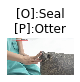

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ps, xs, ys = get_images(x_test, y_test, 100)
accu = model.evaluate(xs, ys)[1]
print("命中率:", accu * 100, "%")
# 如果是使用Model, 而不是Sequential的話
# 你會沒有 predict_classes
# 你要用predict + argmax來替代
pre = model.predict(xs).argmax(axis=1)

x_final_test = np.array(list(map(lambda p:np.array(load_img(p)), ps)))
idx = np.nonzero(pre != ys)[0][:200]
pre_false_img = x_final_test[idx]
pre_false_label = ys[idx]
pre_false_pre = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 8))

trans = ["Otter", "Seal"]
z = zip(pre_false_img, pre_false_label, pre_false_pre)
# (i, (z1, z2, z3))
for i, (img, label, p) in enumerate(z):
    plt.subplot(height, width, i+1)
    plt.title("[O]:{}\n[P]:{}".format(trans[label], trans[p]))
    plt.axis("off")
    plt.imshow(img)